<a href="https://colab.research.google.com/github/Robin-Rego/Coronavirus-Tweet-Sentiment-Analysis/blob/main/Robin_Rego_Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Data Collecting**

In [42]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import math
%matplotlib inline

In [43]:
df = pd.read_csv("/content/drive/MyDrive/Almabetter-Project/Classification ML-  Corona virus tweet sentiment analysis/Coronavirus Tweets.csv", encoding='ISO-8859-1')

In [44]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [45]:
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [46]:
df.shape

(41157, 6)

From this we come to know that the shape of Dataset is 41157 Rows and 6 Columns

#**Data Analyzing**

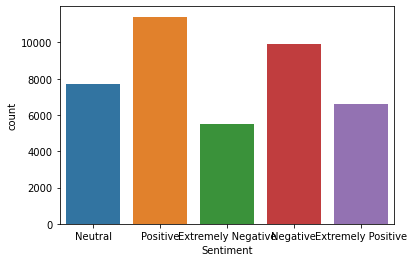

In [8]:
sns.countplot(x = 'Sentiment', data = df)

In [9]:
# Let's get dummy variables of TweetAt
unique_TweetAt = df['TweetAt'].unique()
unique_TweetAt

array(['16-03-2020', '17-03-2020', '18-03-2020', '19-03-2020',
       '20-03-2020', '21-03-2020', '22-03-2020', '23-03-2020',
       '24-03-2020', '25-03-2020', '26-03-2020', '27-03-2020',
       '28-03-2020', '29-03-2020', '30-03-2020', '31-03-2020',
       '01-04-2020', '02-04-2020', '03-04-2020', '04-04-2020',
       '05-04-2020', '06-04-2020', '07-04-2020', '08-04-2020',
       '09-04-2020', '10-04-2020', '11-04-2020', '12-04-2020',
       '13-04-2020', '14-04-2020'], dtype=object)

In [10]:
#df = pd.concat([df, unique_TweetAt], axis = 1)

In [11]:
# Checking the relationship between the Sentiment and unique_TweetAt columns
#sns.countplot(x = 'Sentiment', hue = 'unique_TweetAt', data = df)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [13]:
df.describe(include = 'all')

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,41157.000000,41157.000000,32567,41157,41157,41157
unique,NaN,NaN,12220,30,41157,5
top,NaN,NaN,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,NaN,NaN,540,3448,1,11422
mean,24377.000000,69329.000000,NaN,NaN,NaN,NaN
std,11881.146851,11881.146851,NaN,NaN,NaN,NaN
min,3799.000000,48751.000000,NaN,NaN,NaN,NaN
25%,14088.000000,59040.000000,NaN,NaN,NaN,NaN
50%,24377.000000,69329.000000,NaN,NaN,NaN,NaN
75%,34666.000000,79618.000000,NaN,NaN,NaN,NaN


#**Data Wrangling**

In [14]:
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

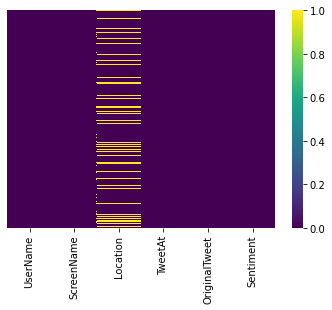

In [15]:
# Let's plot a heatmap to check the Nan values
sns.heatmap(df.isnull(), yticklabels = False, cmap = 'viridis')

In [16]:
df["Location"].fillna(df['Location'].mode().iloc[0],inplace=True)

In [17]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,London,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,London,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [18]:
# Let's check if there are any null values present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       41157 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [19]:
df.isnull().sum()

UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64

No null values are there in the Dataset

#**Data PreProcessing**

In [47]:
#for preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [48]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [50]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [51]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [52]:
# STAGE 1: Let's convert all the text in the 'OriginalTweet' column to lower case
clean_text_1 = []
def to_lower_case(data):
  for words in  df['OriginalTweet']:
    clean_text_1.append(str.lower(words))

In [53]:
print(to_lower_case('OriginalTweet'))

None


In [63]:
# Let's remove semicolons, paranthesis, special characters and symbols 
import re

"""for i in df["OriginalTweet"]:
  clean_text_2 = []
  res = re.sub(r'[^\s]',"", i)
  if res!="":
    clean_text_2.append(res)
df = pd.concat([df, pd.DataFrame(clean_text_2, columns=["CleanedTweet"])], axis=1, sort=False)
"""

'for i in df["OriginalTweet"]:\n  clean_text_2 = []\n  res = re.sub(r\'[^\\s]\',"", i)\n  if res!="":\n    clean_text_2.append(res)\ndf = pd.concat([df, pd.DataFrame(clean_text_2, columns=["CleanedTweet"])], axis=1, sort=False)\n'

In [64]:

reg = re.compile("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z t])|(w+://S+)")
tweet = []
for i in df["OriginalTweet"]:
  tweet.append(reg.sub(" ", i))
df = pd.concat([df, pd.DataFrame(tweet, columns=["CleanedTweet"])], axis=1, sort=False)

In [65]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,CleanedTweet,CleanedTweet,CleanedTweet,CleanedTweet,CleanedTweet,CleanedTweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,,,NaN,,Gahan https t co iFz9FAn2Pa and https ...,Gahan https t co iFz9FAn2Pa and https ...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,NaN,NaN,NaN,NaN,advice Talk to your neighbours family to excha...,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,NaN,NaN,NaN,NaN,Coronavirus Australia Woolworths to give elde...,Coronavirus Australia Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,NaN,NaN,NaN,NaN,My food stock is not the only one which is emp...,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,NaN,NaN,NaN,NaN,Me ready to go at supermarket during the ou...,Me ready to go at supermarket during the ou...


In [66]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

#**Note:** If we check the dataset there are a lot of "String values". Therefore, this string value has to be converted into "Dummy Variables" in order to implement "Logistic Regression".

In [ ]:
"""
Listing down the columns which are String values.
A. Location
B. Sentiment

NOTE: We can delete Original Tweet Column
"""
locations = pd.get_dummies(df['Location'])
locations

,,Texas,170825 ? shinee ? svt ? vixx,UK to Detroit Worldwide,VA - TX - ??- Belgium??,#Australia #Oceania,#LeafsNation ??,#Newyork USA #America,+254 (Kenya),"2105 Bridge City, Texas 77611",...,"ÃT: 51.4761159,-2.5612165","ÃT: 51.512407,-0.136951","ÃT: 51.560275,-0.00859","ÃT: 51.56353,-0.08759","ÃT: 53.839856,-0.436773","ÃT: 54.975455,-1.595362","ÃT: 59.19408,17.620422",Ã l'Ã©chelle mondiale,Ã­ ?Ã­?? Ã­? ? ????? ?????? ?????,Ã¯? ???????'? ?????????
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
